In [1]:
# Import Packages and Data
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Flatten,Conv2D, MaxPool2D
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

print("Packages successfully installed! ✅")

Packages successfully installed! ✅


In [2]:
(train_images, train_labels),(test_images, test_labels)=mnist.load_data()

In [3]:
train_images = train_images.reshape(train_images.shape[0],28,28,1)
test_images = test_images.reshape(test_images.shape[0],28,28,1)

In [4]:
train_images=train_images/255.0
test_images=test_images/255.0

### Create the Model

In [5]:
model = Sequential()
model.add(Conv2D(32,(3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(2,2))
model.add(Conv2D(16,(3,3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

/opt/anaconda3/lib/python3.13/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        51,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 57,562 (224.85 KB)

 Trainable params: 57,562 (224.85 KB)

 Non-trainable params: 0 (0.00 B)

### Compile the Model

In [7]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [8]:
model.fit(train_images, train_labels, epochs=5)

print("Model Trained ..................[ ✅ ]")

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9514 - loss: 0.1615
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9832 - loss: 0.0533
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9889 - loss: 0.0371
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9911 - loss: 0.0284
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9929 - loss: 0.0223
Model Trained ..................[ ✅ ]


### Model Evaluation

In [9]:
model.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9923 - loss: 0.0272


[0.027191124856472015, 0.9922999739646912]

In [10]:
classification = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


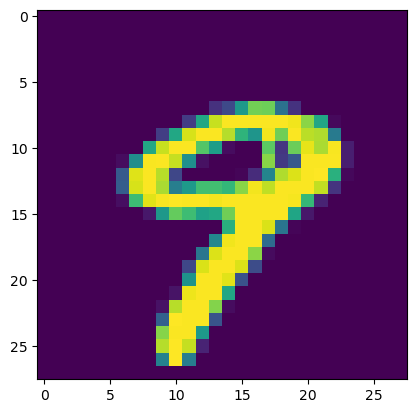

In [11]:
plt.imshow(test_images[9].reshape(28,28))

### Testing the Model

In [12]:
print(np.argmax(classification[9]))

9


### Test With Your Own Image

In [13]:
from PIL import Image
import numpy as np

size = 28, 28
image1 = "digit2.png"
im = Image.open(image1)
im = im.convert('L')  # Convert to grayscale
im_resized = im.resize(size, Image.LANCZOS)

# Invert colors if your digit is black on white background
img = np.array(im_resized)
img = 255 - img  # Invert: black→white, white→black
img = img / 255.0
img = np.reshape(img, (1, 28, 28, 1))

prediction = model.predict(img)
print(np.argmax(prediction))



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2


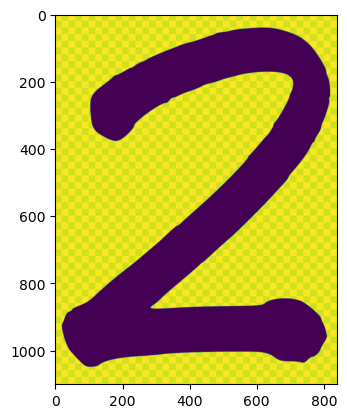

In [14]:
plt.imshow(im)

### Save the Model
**Note:** When saving weights, you must use `.weights.h5` extension. When saving the full model, use `.keras` extension.

In [15]:
model.save("digitModel.keras")

print("="*70)
print("Model Successfully Saved ✅")
print("="*70)

Model Successfully Saved ✅


In [17]:
model.save_weights("digitModelWeights.weights.h5")

print("="*70)
print("Model Weights Successfully Saved ✅")
print("="*70)

Model Weights Successfully Saved ✅


In [18]:
new_model = load_model("digitModel.keras")

print("="*70)
print("Model Loaded Successfully  ✅")
print("="*70)

Model Loaded Successfully  ✅


In [20]:

new_model.load_weights("digitModelWeights.weights.h5")
print("="*70)
print("Model Weights Loaded Successfully ✅")
print("="*70)

Model Weights Loaded Successfully ✅
